In [1]:
using Random
using Distributions
using StatsPlots
using StatsBase
pyplot()
using QuadGK
using StaticArrays

name(dist::UnivariateDistribution) = replace(string(dist), r"{[^{.]*}"=>"")

name (generic function with 1 method)

In [2]:
function sim_median(dist, n; L = 10^5)
    M = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, tmp[Threads.threadid()])
        M[i] = median(X)
    end
    M
end

function pdfbeta_median(dist, n, x)
    beta = Beta((n+1)/2, (n+1)/2)
    pdf(beta, cdf(dist, x)) * pdf(dist, x)
end

function cdfbeta_median(dist, n, x)
    beta = Beta((n+1)/2, (n+1)/2)
    cdf(beta, cdf(dist, x))
end

function plot_simmedian(; dist = Uniform(), n = 9, L = 10^6, p = (0.0, 1.0))
    M = sim_median(dist, n; L)
    P1 = histogram(M; norm=true, alpha=0.3, bin = 100, label="sim")
    plot!(x -> pdfbeta_median(dist, n, x), extrema(M)...; label="Beta approx", lw=2)
    title!("$(name(dist)), n = $n")
    plot!(; xlim = quantile.(Ref(M), p))

    M = sim_median(dist, n+1; L)
    P2 = histogram(M; norm=true, alpha=0.3, bin = 100, label="sim")
    plot!(x -> pdfbeta_median(dist, n+1, x), extrema(M)...; label="Beta approx", lw=2)
    title!("$(name(dist)), n = $(n+1)")
    plot!(; xlim = quantile.(Ref(M), p))

    plot(P1, P2; size=(800, 300))
end

plot_simmedian (generic function with 1 method)

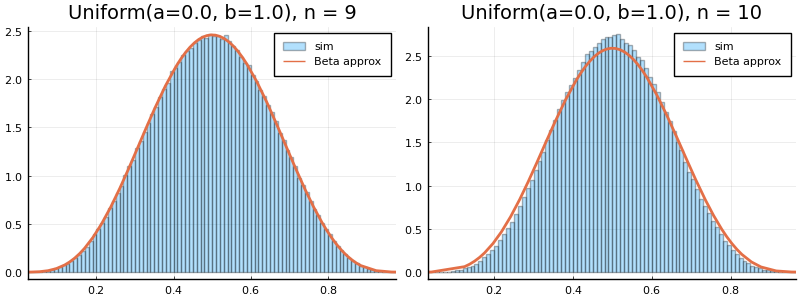

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall D:\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


In [3]:
plot_simmedian(; dist = Uniform())

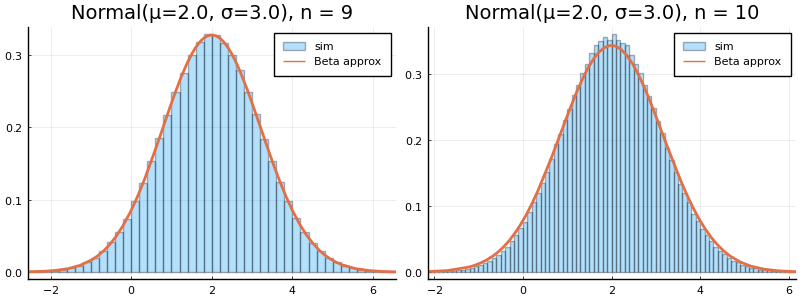

In [4]:
plot_simmedian(; dist = Normal(2, 3), p = (0.0001, 0.9999))

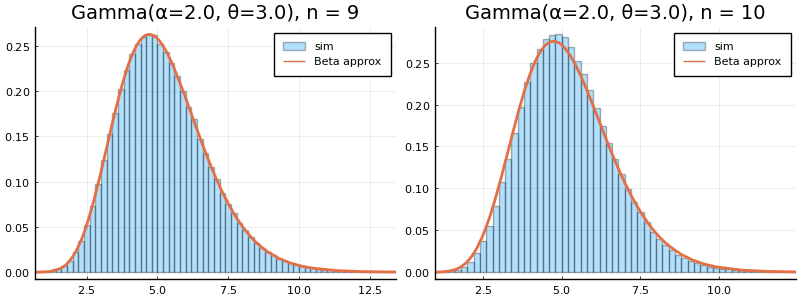

In [5]:
plot_simmedian(; dist = Gamma(2, 3), p = (0.0, 0.9999))

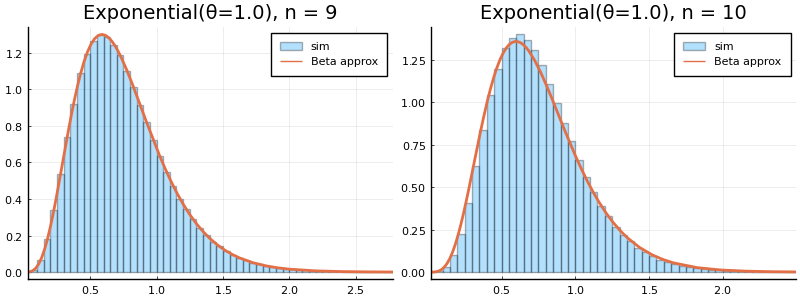

In [6]:
plot_simmedian(; dist = Exponential(), p = (0.0, 0.9999))

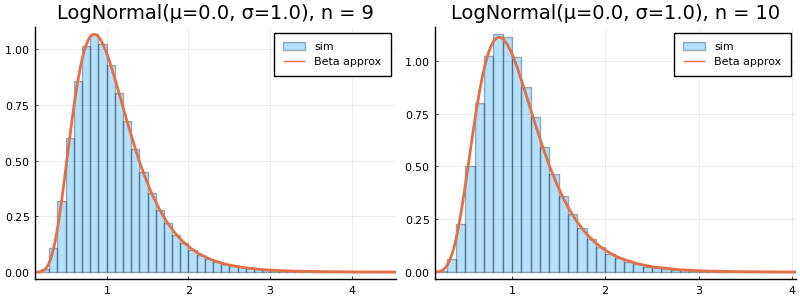

In [7]:
plot_simmedian(; dist = LogNormal(), p = (0.0, 0.9999))

In [8]:
function betamedian(n, z)
    0 < z < 1 || return 0.0
    m = n / 2
    p(x, y) = pdf(Dirichlet(SVector(m, 1, m)), SVector(x, y-x, 1-y))
    2quadgk(x -> p(x, 2z - x), 0, z)[1]
end

function plot_Betas(n)
    plot(x -> betamedian(n, x), 0, 1; label="true dist")
    plot!(x -> pdf(Beta((n+1)/2, (n+1)/2), x), 0, 1; ls=:dash, label="n")
    plot!(x -> pdf(Beta((n+2)/2, (n+2)/2), x), 0, 1; ls=:dashdot, label="n+1")
    title!("dist of median and approx: n = $n")
end

plot_Betas (generic function with 1 method)

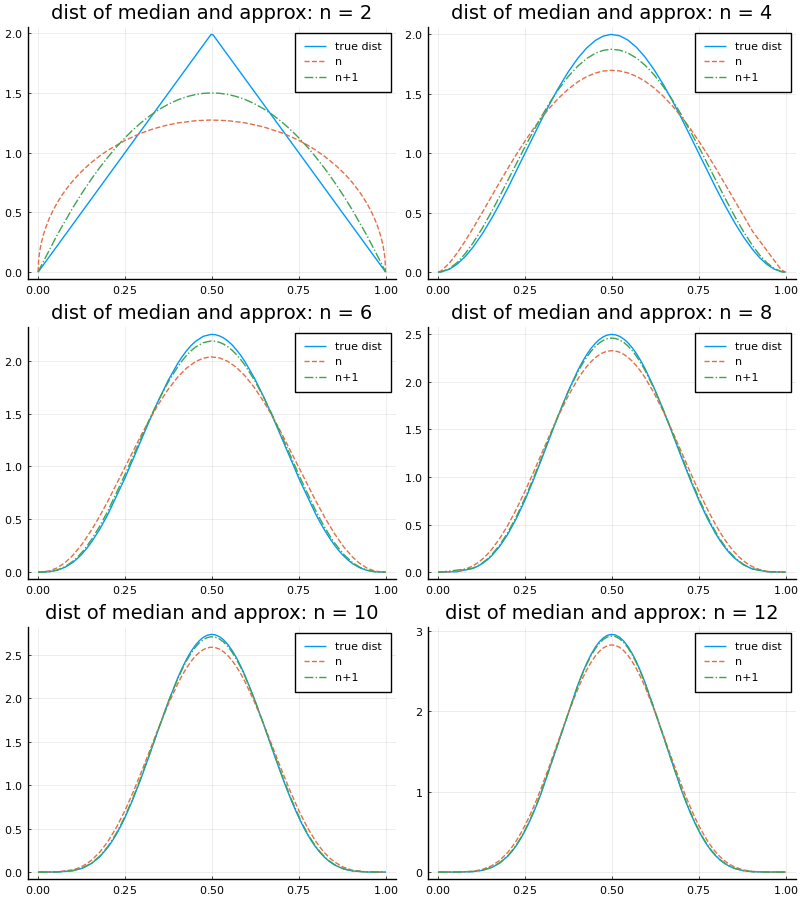

In [9]:
PP = []
for n in 2:2:12
    P = plot_Betas(n)
    push!(PP, P)
end
plot(PP...; size=(800, 900), layout=(3, 2))#, legend=false)

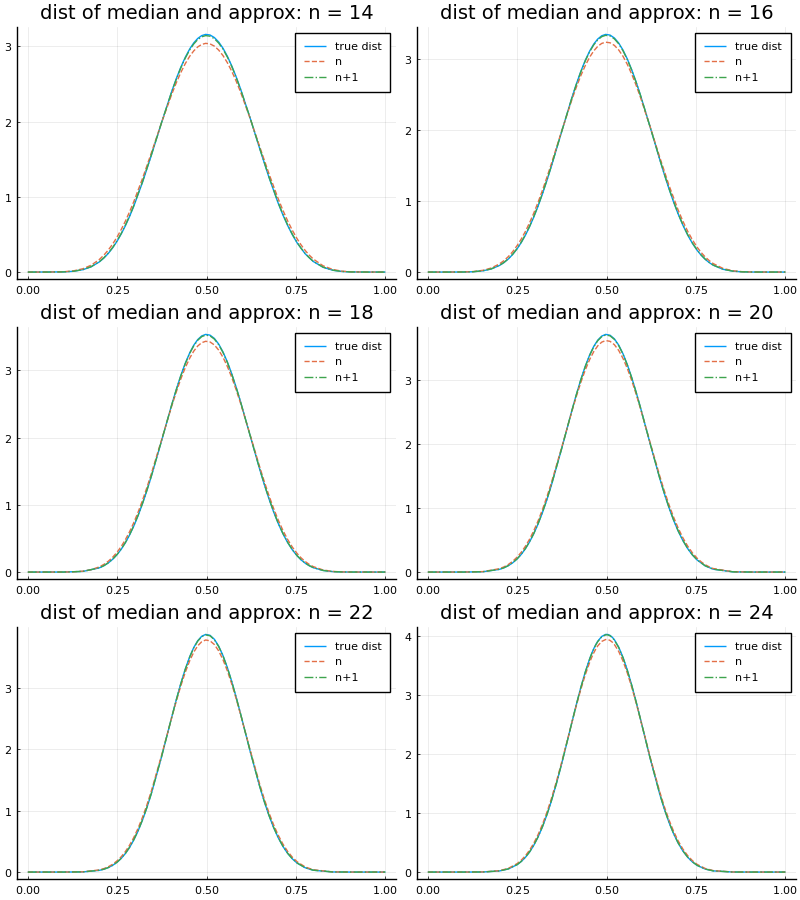

In [10]:
PP = []
for n in 14:2:24
    P = plot_Betas(n)
    push!(PP, P)
end
plot(PP...; size=(800, 900), layout=(3, 2))#, legend=false)

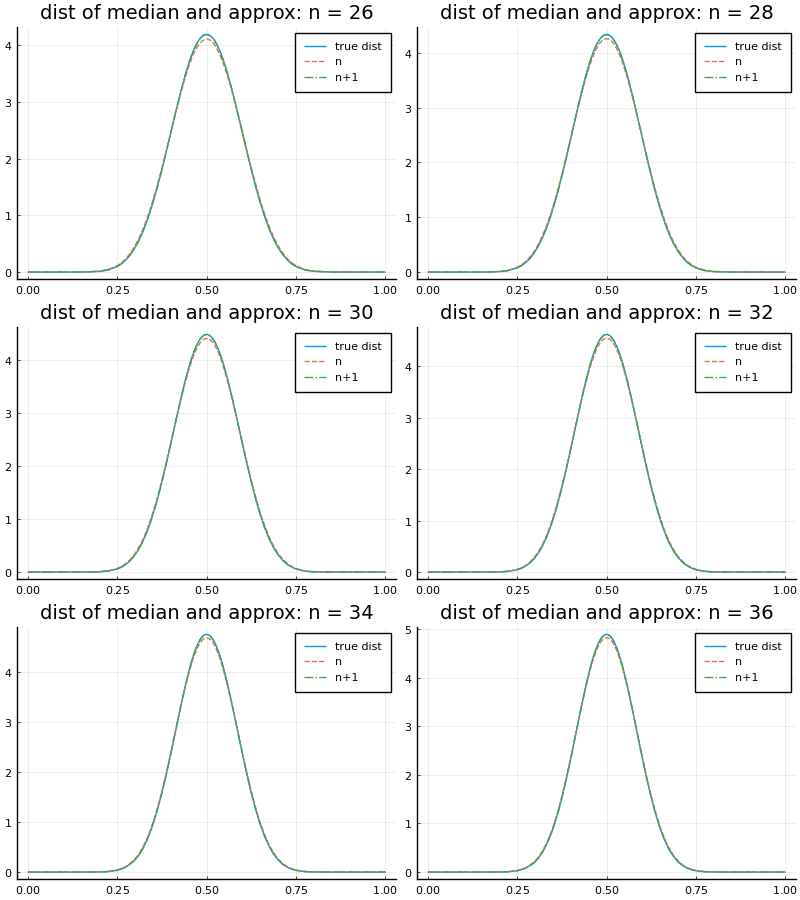

In [11]:
PP = []
for n in 26:2:36
    P = plot_Betas(n)
    push!(PP, P)
end
plot(PP...; size=(800, 900), layout=(3, 2))#, legend=false)

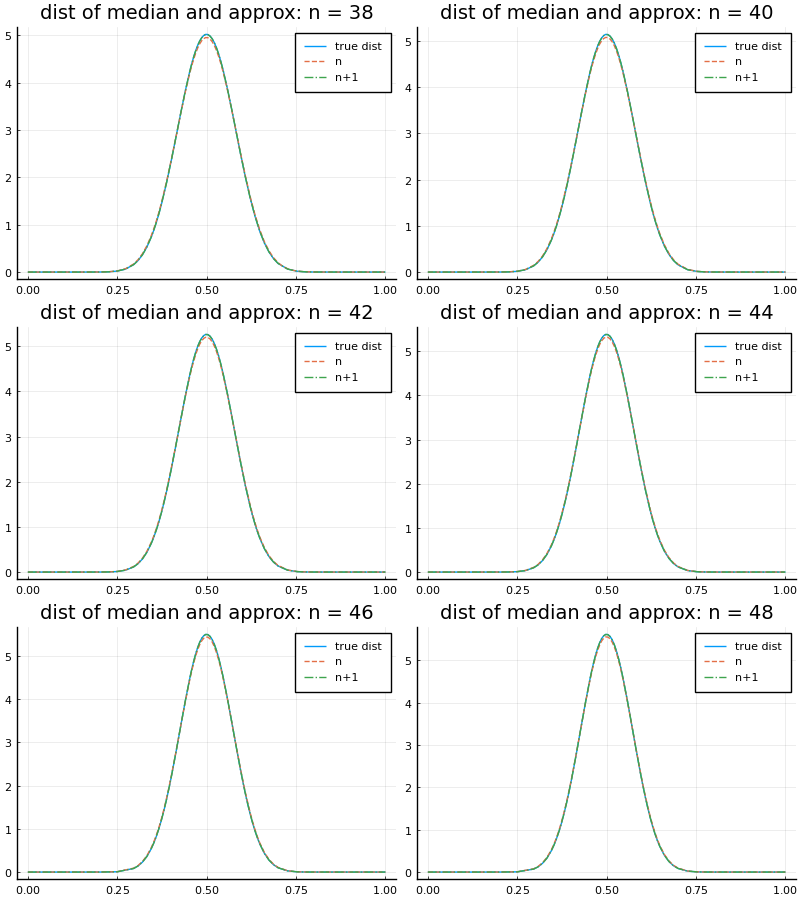

In [12]:
PP = []
for n in 38:2:48
    P = plot_Betas(n)
    push!(PP, P)
end
plot(PP...; size=(800, 900), layout=(3, 2))#, legend=false)